Analysis of adult salary dataset using census data of 1994.
The aim is to make prediction on whether an adult earns less or more than 50K based on various characteristics such as education, age, maritial status, race....

Attribute Information: 

- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- class: >50K, <=50K
- ? for missing value

In [1]:
# handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
# to display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns',None)


In [2]:
# load dataset
data= pd.read_csv('E:/DataScience/Projects/adult_salary/data/raw/adult_data.txt',sep=',',header=None)
print(data.shape)
data.head()

(32561, 15)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
# add columns to the dataset
data.columns=['age','workclass','fnlwgt','education','education-num','marital-status','occupation',
              'relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','class']

# check the data sample
data.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


There are no missing values in numerical data.

In [5]:
# check the sample size for the two different class
data['class'].value_counts()

 <=50K    24720
 >50K      7841
Name: class, dtype: int64

There is more than 3x sample for adults will lower than 50K. 

# analysis steps
 1. missing values
 2. numerical variables
 3. outliers
 4. categorical variables
 5. cardinality of categorical variables
 6. relationship between variables and target variable

## missing values

In [6]:
x= data.copy()

In [7]:
x['workclass']=x['workclass'].replace(' ?',"missing")

In [8]:
x[x['workclass']=='missing']

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
27,54,missing,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,missing,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
69,25,missing,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
77,67,missing,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
106,17,missing,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,missing,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32531,30,missing,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32539,71,missing,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32541,41,missing,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [9]:
# replace all the quotation marks with numpy nan value 
data = data.replace(' ?', "missing")

In [10]:
# find percentage of missing value per variable
data.where(data=="missing").count()/data.shape[0]

age               0.000000
workclass         0.056386
fnlwgt            0.000000
education         0.000000
education-num     0.000000
marital-status    0.000000
occupation        0.056601
relationship      0.000000
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
native-country    0.017905
class             0.000000
dtype: float64

The dataset contains few missing values. The percentage of values is around 5% we may consider it as a missing variable or replace it with mode and have a missing indicator.

#### relationship between missing value and target variable

In [11]:
# generate count plot between variable list and target variable 
var_cat_missing =['workclass','occupation','native-country']

In [12]:
pd.crosstab(data['workclass'],data['class'])

class,<=50K,>50K
workclass,,
Federal-gov,589,371
Local-gov,1476,617
Never-worked,7,0
Private,17733,4963
Self-emp-inc,494,622
Self-emp-not-inc,1817,724
State-gov,945,353
Without-pay,14,0
missing,1645,191


In [13]:
pd.crosstab(data['occupation'],data['class'])

class,<=50K,>50K
occupation,,
Adm-clerical,3263,507
Armed-Forces,8,1
Craft-repair,3170,929
Exec-managerial,2098,1968
Farming-fishing,879,115
Handlers-cleaners,1284,86
Machine-op-inspct,1752,250
Other-service,3158,137
Priv-house-serv,148,1


In [14]:
pd.crosstab(data['native-country'],data['class'])

class,<=50K,>50K
native-country,,
Cambodia,12,7
Canada,82,39
China,55,20
Columbia,57,2
Cuba,70,25
Dominican-Republic,68,2
Ecuador,24,4
El-Salvador,97,9
England,60,30


In [15]:
df_missing=data[(data['workclass']=='missing') | 
      (data['occupation']=='missing') | 
      (data['native-country']=='missing')]
print('Total number of data entry with missing values : ', df_missing.shape[0])
print ('Percentage of data entry with missing values: ', df_missing.shape[0]/data.shape[0])

Total number of data entry with missing values :  2399
Percentage of data entry with missing values:  0.07367709836921471


In [16]:
df_missing.sample(20)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
20203,22,Private,166371,HS-grad,9,Never-married,Other-service,Other-relative,White,Male,0,0,40,missing,<=50K
3980,55,missing,106707,Assoc-acdm,12,Married-civ-spouse,missing,Husband,Black,Male,0,0,20,United-States,>50K
695,25,missing,202480,Assoc-acdm,12,Never-married,missing,Other-relative,White,Male,0,0,45,United-States,<=50K
31128,56,Local-gov,268213,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,35,missing,>50K
19490,63,Private,221072,Bachelors,13,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,49,missing,<=50K
18257,28,missing,424884,10th,6,Separated,missing,Not-in-family,White,Male,0,0,30,United-States,<=50K
4925,28,missing,290267,Bachelors,13,Never-married,missing,Not-in-family,White,Male,0,0,18,United-States,<=50K
12695,22,State-gov,156773,Some-college,10,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,15,missing,<=50K
22861,36,Private,361888,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,missing,>50K
17757,48,missing,175653,Assoc-acdm,12,Divorced,missing,Not-in-family,White,Female,14084,0,40,United-States,>50K


Missing values are mostly in the <50K category. But we also have a large sample of <50K category. We can use it as a seperate variable or a rare variable. Only ~7% of data has missing values so we could potentially drop data entry with missing values.

#### analyse numerical variable

In [17]:
# identify numerical variables
var_num =[var for var in data.columns if data[var].dtypes !='O']
print ('number of numerical variable : ',len(var_num))
var_num

number of numerical variable :  6


['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

Note that the fnlwgt seems to be a calcualted value based on other parameters. Perhaps we can drop it in our prediction.

In [18]:
# add colum to index the class below <=50K as 1
data['classIndex']=data.apply(lambda x: 1 if (x['class']==' <=50K')else 0, axis =1)

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'fnlwgt'}>],
       [<AxesSubplot:title={'center':'education-num'}>,
        <AxesSubplot:title={'center':'capital-gain'}>],
       [<AxesSubplot:title={'center':'capital-loss'}>,
        <AxesSubplot:title={'center':'hours-per-week'}>]], dtype=object)

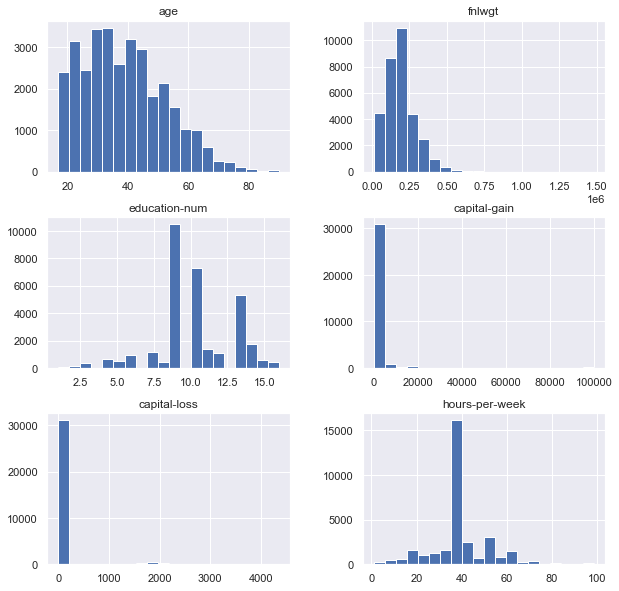

In [19]:
data[var_num].hist(figsize=(10,10),bins=20)

#### Age

<AxesSubplot:xlabel='class', ylabel='age'>

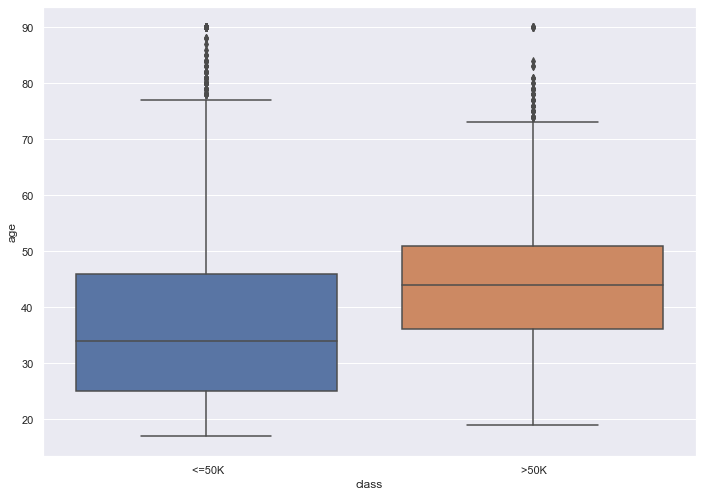

In [20]:
# side by side box plot of age distribution with the salary group
sns.boxplot(data=data,x='class',y='age')

Older age group seems to be earning more in general but not above retirement years. 

<AxesSubplot:xlabel='class', ylabel='age'>

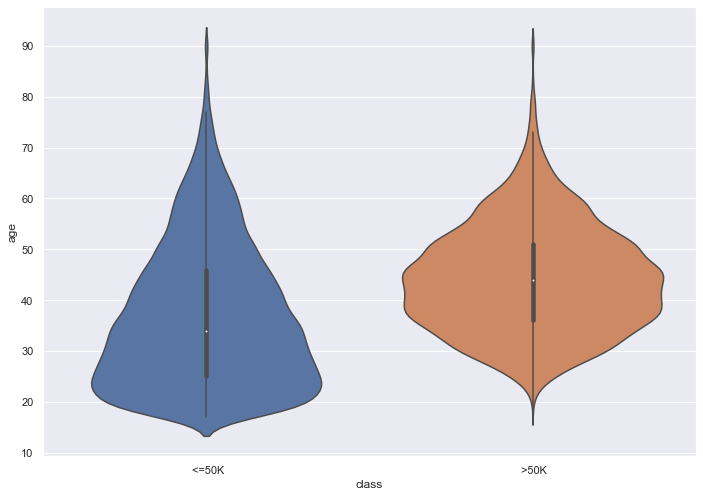

In [21]:
sns.violinplot(data=data,x='class',y='age')

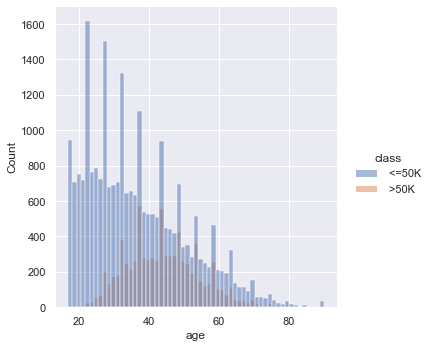

In [22]:
sns.displot(data,x='age',hue='class')

The distribution of the age and the salary class shows the working class in the mid age are likely to have more salary than lower age. 

Age variable has been cut off at the lower end at 20. The distribution should some relation between the age and the salary group. If we do not consider the cut of it should sign of normal distribution. We can consider creating bins for age group. There are outliers present in the age variables.

#### education num

<AxesSubplot:xlabel='class', ylabel='education-num'>

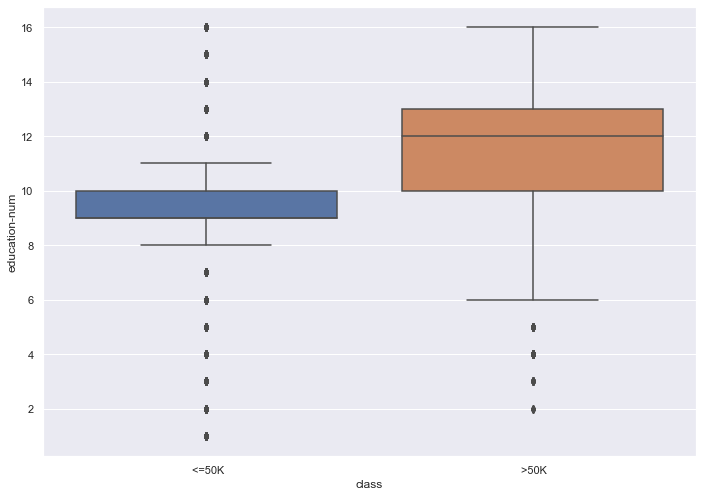

In [23]:
sns.boxplot(data=data,x='class',y='education-num')

<AxesSubplot:xlabel='class', ylabel='education-num'>

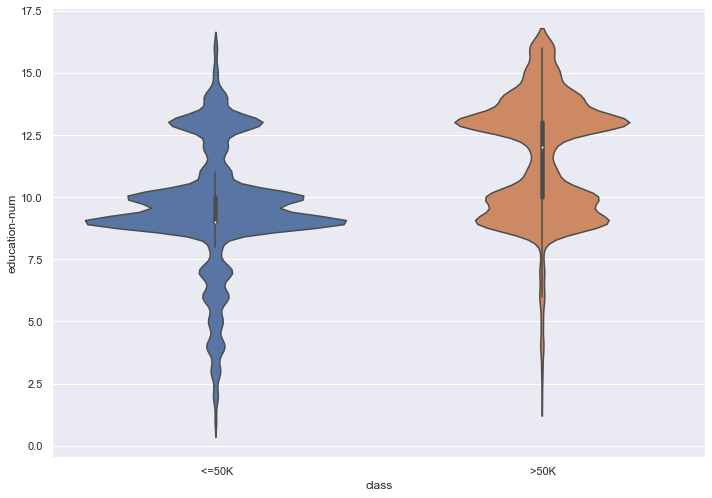

In [24]:
sns.violinplot(data=data,x='class',y='education-num')

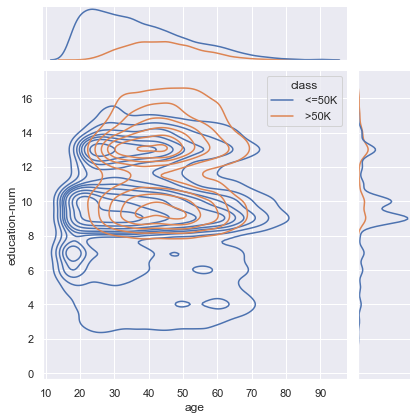

In [25]:
sns.jointplot(data=data,x='age',y='education-num',hue='class',kind='kde')


The number of year of eduction does seem to have a relation with the salary. We might bin the education num into groups lower than high school <7years, high school 7-10, 10-12, university 12-15, above 15.We need to see what the sample size will be per bin and if there are enough sample per bin.b

#### capital gain

<AxesSubplot:>

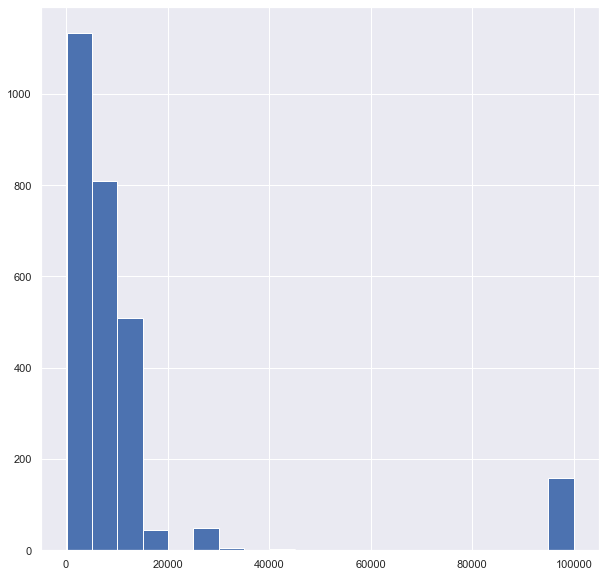

In [26]:
data[data['capital-gain']>0]['capital-gain'].hist(figsize=(10,10),bins=20)

<AxesSubplot:xlabel='class', ylabel='capital-gain'>

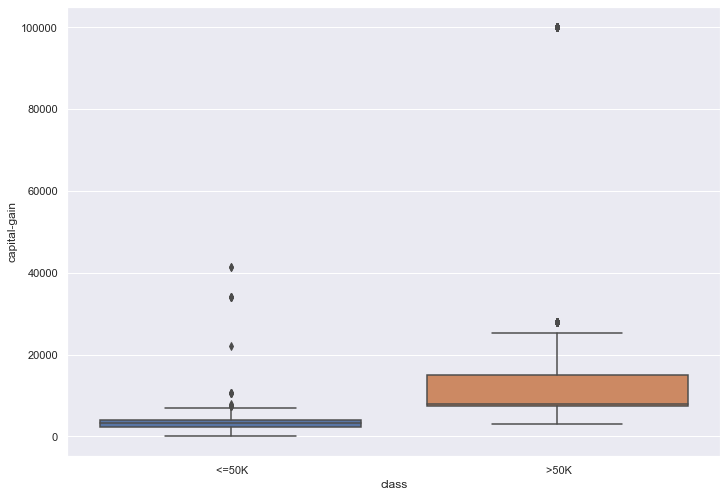

In [27]:
sns.boxplot(data=data[data['capital-gain']>0],x='class',y='capital-gain')

<AxesSubplot:xlabel='class', ylabel='capital-gain'>

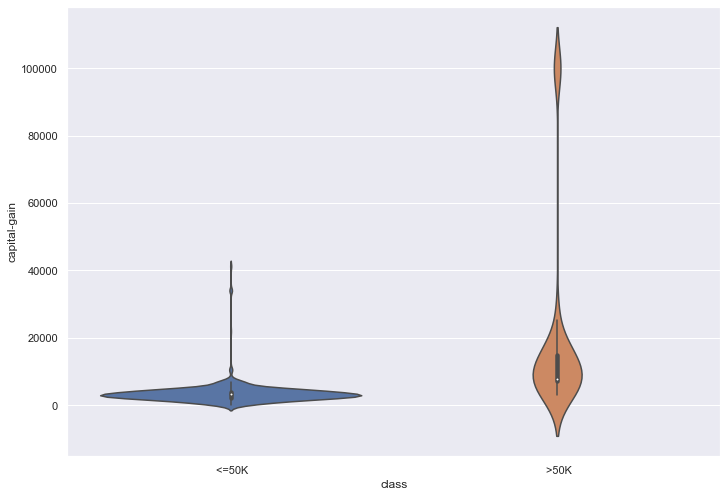

In [28]:
sns.violinplot(data=data[data['capital-gain']>0],x='class',y='capital-gain')

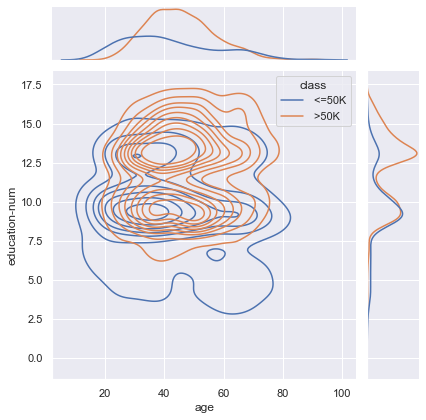

In [29]:

sns.jointplot(data=data[data['capital-gain']>0],x='age',y='education-num',hue='class',kind='kde')

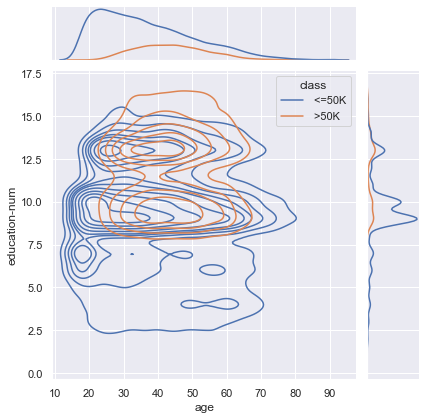

In [30]:

sns.jointplot(data=data[data['capital-gain']==0],x='age',y='education-num',hue='class',kind='kde')

In [31]:
data[data['capital-gain']>0]['class'].value_counts(ascending=True)

 <=50K    1035
 >50K     1677
Name: class, dtype: int64

In [32]:
data[data['capital-gain']<=0]['class'].value_counts(ascending=True)

 >50K      6164
 <=50K    23685
Name: class, dtype: int64

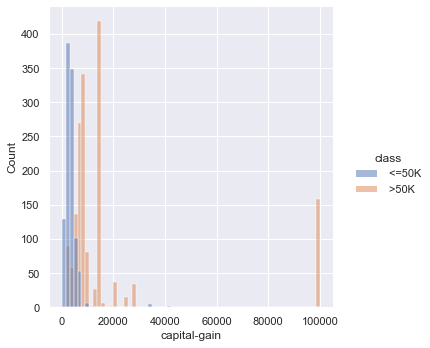

In [33]:
sns.displot(data[data['capital-gain']>0],x='capital-gain',hue='class')

Capital gain has a distinguishing character between adults salary. Together with other variables it can be very useful. It will require binning the capital gain betwen <=0, 10000, >10000. May be we can use dtree to find optimal bins. 

#### capital loss


<AxesSubplot:>

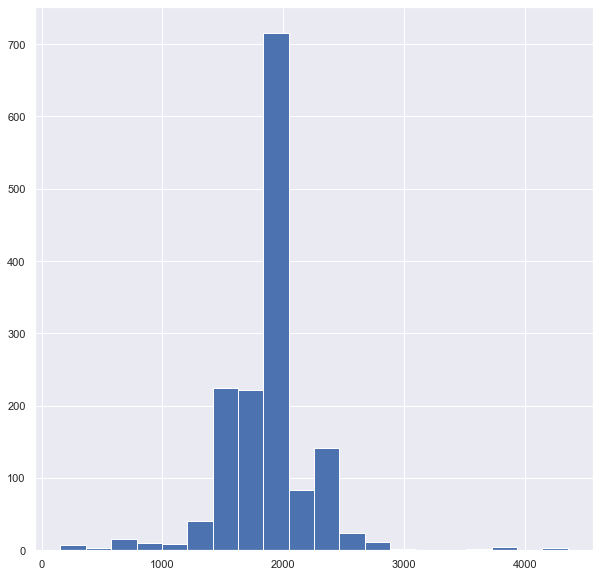

In [34]:
data[data['capital-loss']>0]['capital-loss'].hist(figsize=(10,10),bins=20)

<AxesSubplot:xlabel='class', ylabel='capital-loss'>

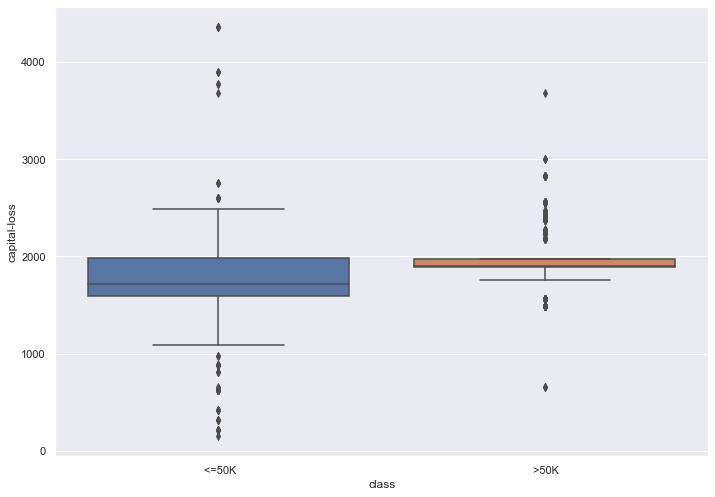

In [35]:
sns.boxplot(data=data[data['capital-loss']>0],x='class',y='capital-loss')

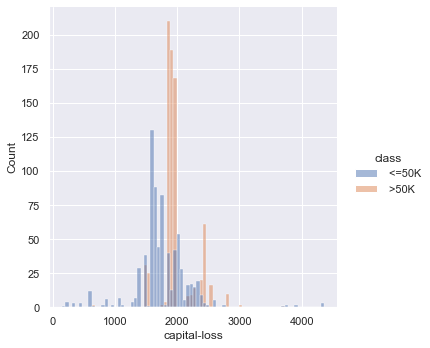

In [36]:
sns.displot(data[data['capital-loss']>0],x='capital-loss',hue='class')

Capital-loss needs to be binned as well. We can use decision tree to find optimal bin size. 


#### hours per week

<AxesSubplot:xlabel='hours-per-week', ylabel='class'>

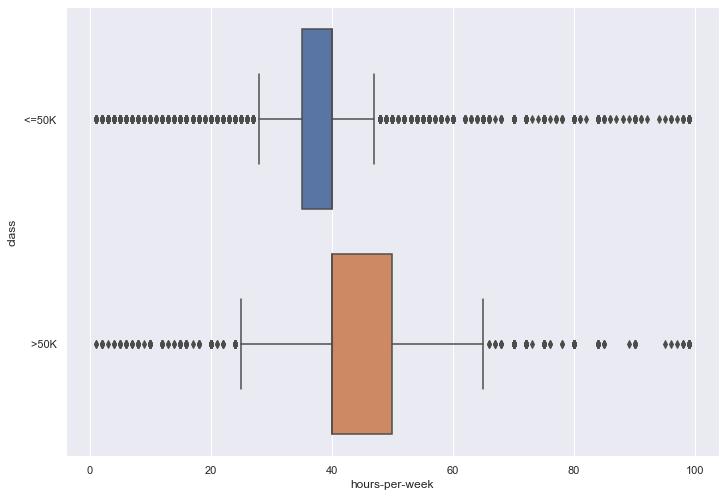

In [37]:
sns.boxplot(data=data,x='hours-per-week',y='class')

<AxesSubplot:xlabel='hours-per-week', ylabel='class'>

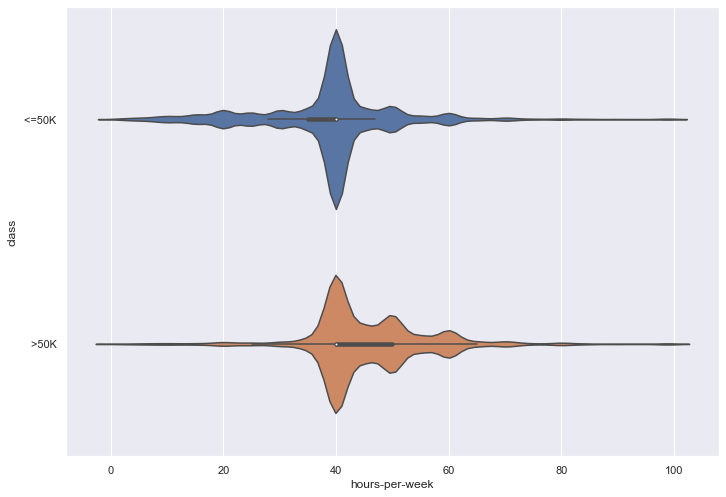

In [38]:
sns.violinplot(data=data,x='hours-per-week',y='class')

<AxesSubplot:xlabel='hours-per-week', ylabel='class'>

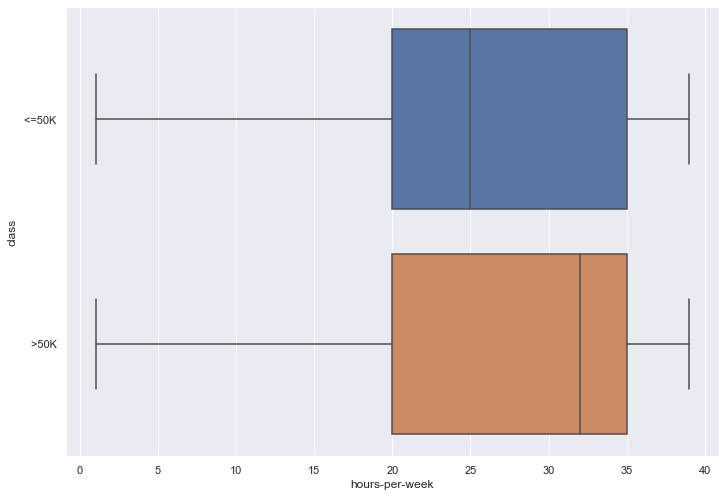

In [39]:
sns.boxplot(data=data[data['hours-per-week']<40],x='hours-per-week',y='class')

<AxesSubplot:xlabel='hours-per-week', ylabel='class'>

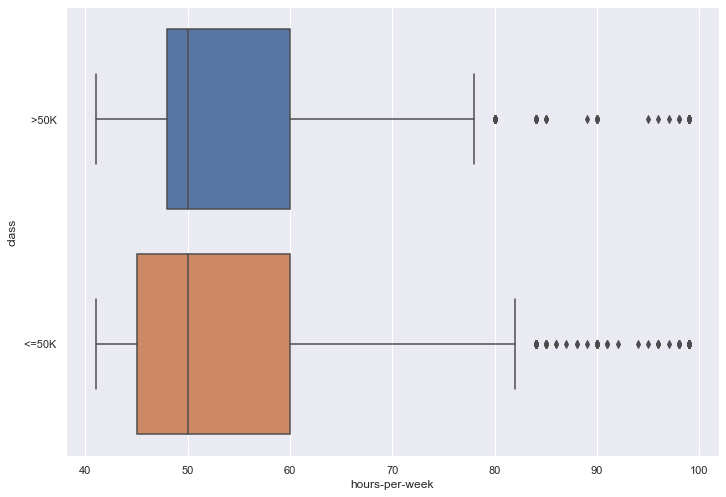

In [40]:
sns.boxplot(data=data[data['hours-per-week']>40],x='hours-per-week',y='class')

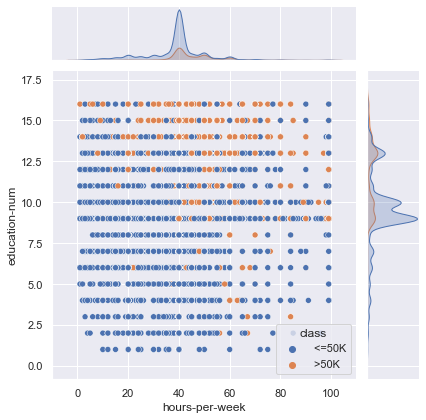

In [41]:
sns.jointplot(data=data,x='hours-per-week',y='education-num',hue='class')

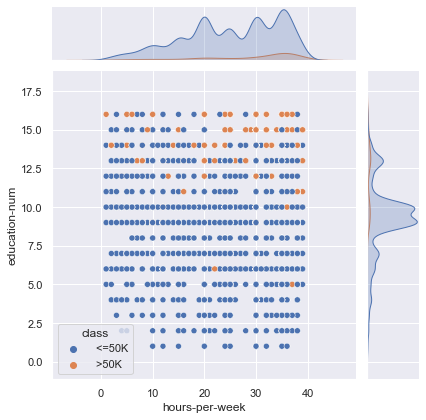

In [42]:
sns.jointplot(data=data[data['hours-per-week']<40],x='hours-per-week',y='education-num',hue='class')

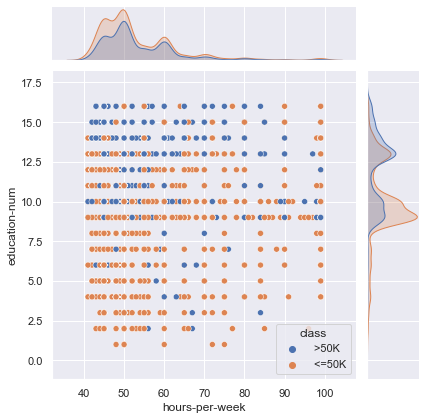

In [43]:
sns.jointplot(data=data[data['hours-per-week']>40],x='hours-per-week',y='education-num',hue='class')

It looks like hours per week has some quality to distinguish the two salary groups. We can test with creating few bins and check how that works. 

There are outliers in all numerical variables

#### exploring outliers

In [44]:
# function to get dataframe with the outliers based on the variable list
def find_outliers(df,var_list,outlier_IQR_multiplier=1.5):
    df=df.copy()
    df_list=[]
    outlier_bounds={}
    for var in iter(var_list):
        q1,q2,q3=np.percentile(df[var],[25,50,75])
        iqr=q3-q1
        outlier_lower_bound= q1-outlier_IQR_multiplier * iqr
        outlier_upper_bound= q3+outlier_IQR_multiplier * iqr
        df_list.append( df[(df[var]< outlier_lower_bound)|
                    (df[var]>outlier_upper_bound)])
        outlier_bounds[var]=(outlier_lower_bound,outlier_upper_bound)
        
    
    return [pd.concat(df for df in df_list),df_list,outlier_bounds]
    
    
        

In [45]:
var_num

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [46]:
# get dataframe with outliers and check the features
df_with_outliers,df_list,outlier_bounds= find_outliers(data,var_num)

In [47]:
outlier_bounds

{'age': (-2.0, 78.0),
 'fnlwgt': (-61009.0, 415887.0),
 'education-num': (4.5, 16.5),
 'capital-gain': (0.0, 0.0),
 'capital-loss': (0.0, 0.0),
 'hours-per-week': (32.5, 52.5)}

Capital gain and loss has predominantly 0 value. So the outliers do not make sense. We can evaluate outlier based on the non-zero values.

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'fnlwgt'}>,
        <AxesSubplot:title={'center':'education-num'}>],
       [<AxesSubplot:title={'center':'capital-gain'}>,
        <AxesSubplot:title={'center':'capital-loss'}>,
        <AxesSubplot:title={'center':'hours-per-week'}>],
       [<AxesSubplot:title={'center':'classIndex'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

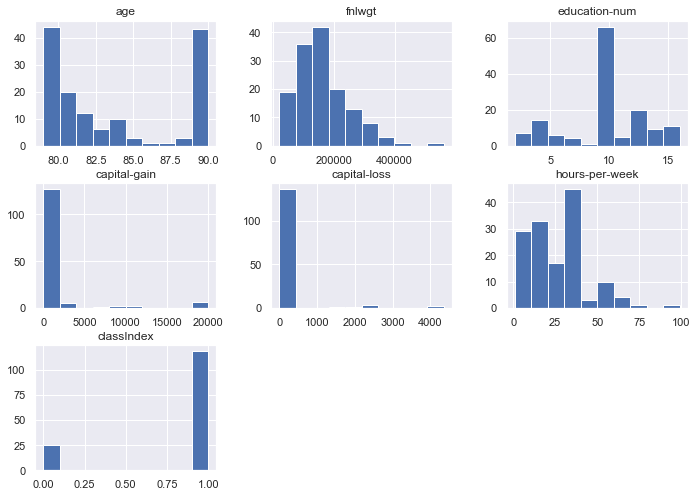

In [48]:
# age outliers
df_list[0].hist()

<AxesSubplot:xlabel='class', ylabel='count'>

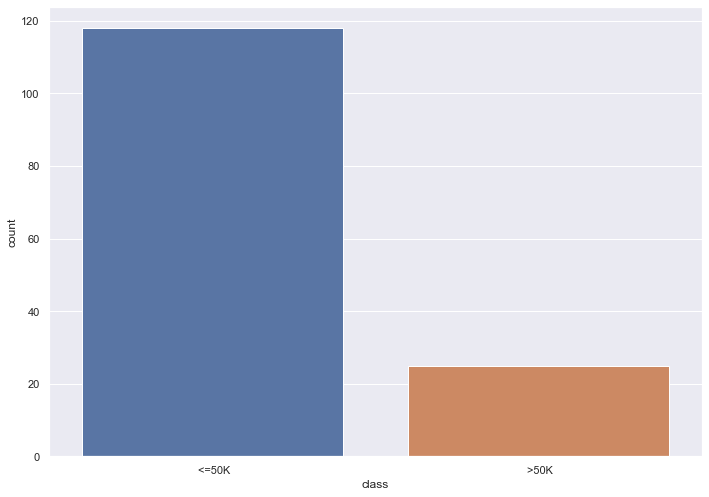

In [49]:
sns.countplot(data=df_list[0],x='class')

sample size of the outliers is quite small. For age we will bin with upper bounds of age.

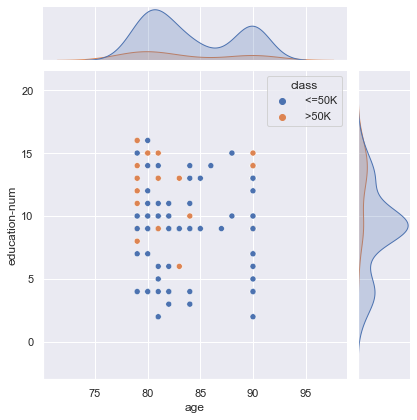

In [50]:
sns.jointplot(data=df_list[0],x='age',y='education-num',hue='class')

<AxesSubplot:xlabel='class', ylabel='count'>

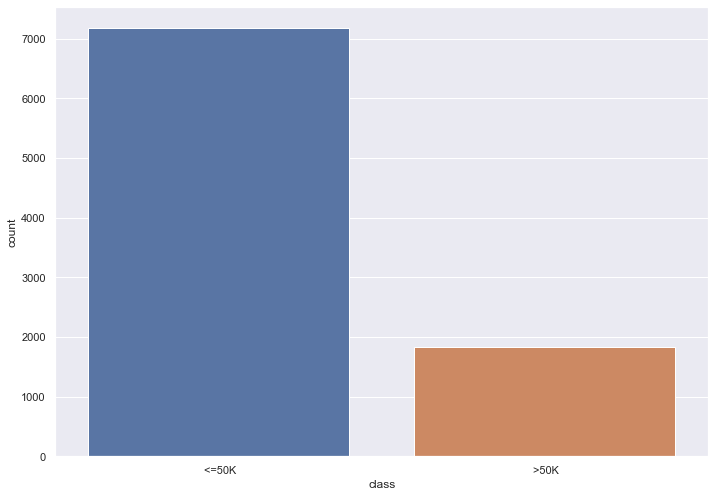

In [51]:
# hours per week
sns.countplot(data=df_list[5],x='class')

<AxesSubplot:>

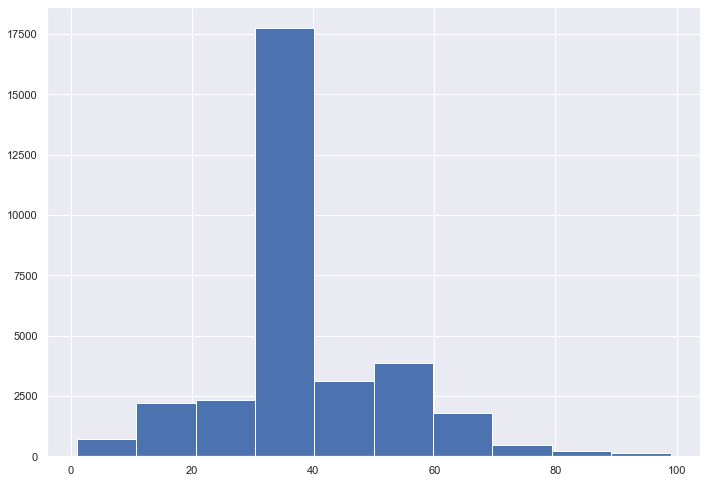

In [52]:
data['hours-per-week'].hist()

There is a good enough sample in the outliers for working hours per week. We can have upper and lower bounds bins to handle outliers.

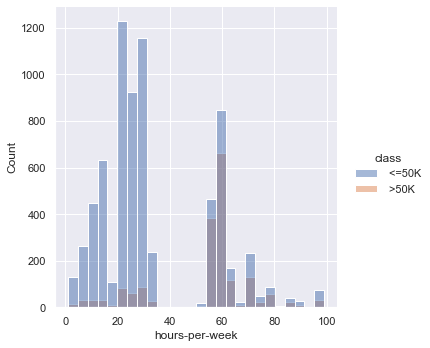

In [53]:
sns.displot(df_list[5],x='hours-per-week',hue='class')

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'fnlwgt'}>,
        <AxesSubplot:title={'center':'education-num'}>],
       [<AxesSubplot:title={'center':'capital-gain'}>,
        <AxesSubplot:title={'center':'capital-loss'}>,
        <AxesSubplot:title={'center':'hours-per-week'}>],
       [<AxesSubplot:title={'center':'classIndex'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

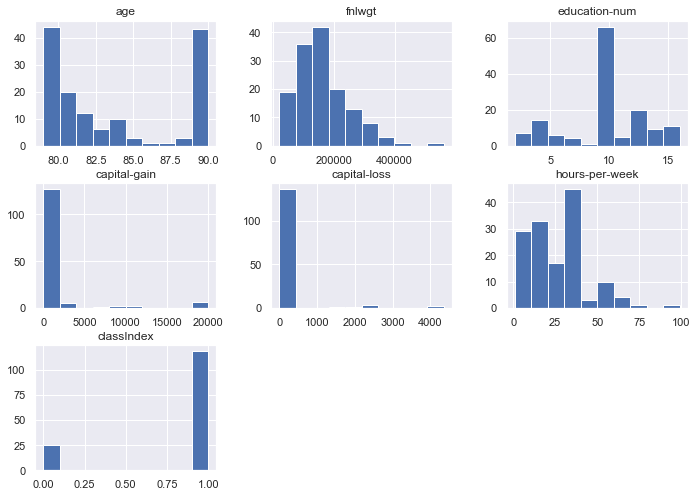

In [54]:
df_list[0].hist()

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'fnlwgt'}>,
        <AxesSubplot:title={'center':'education-num'}>],
       [<AxesSubplot:title={'center':'capital-gain'}>,
        <AxesSubplot:title={'center':'capital-loss'}>,
        <AxesSubplot:title={'center':'hours-per-week'}>],
       [<AxesSubplot:title={'center':'classIndex'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

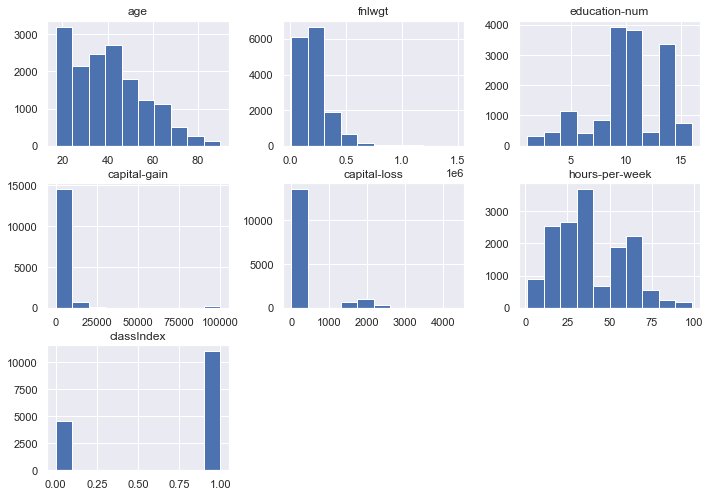

In [55]:
df_with_outliers.hist()

### analyse categorical variable

In [56]:
var_cat =[var for var in data.columns if data[var].dtypes =='O']
print ('number of categorical variable : ',len(var_cat))
var_cat

number of categorical variable :  9


['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'class']

<AxesSubplot:xlabel='workclass', ylabel='count'>

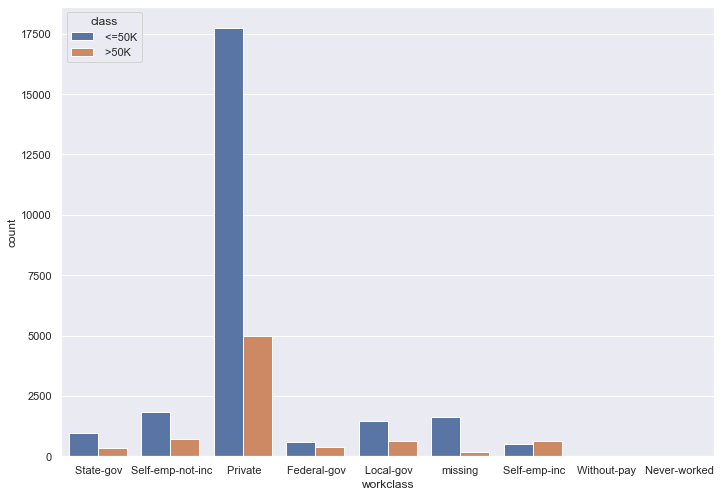

In [57]:
sns.countplot(data=data,x='workclass',hue='class')

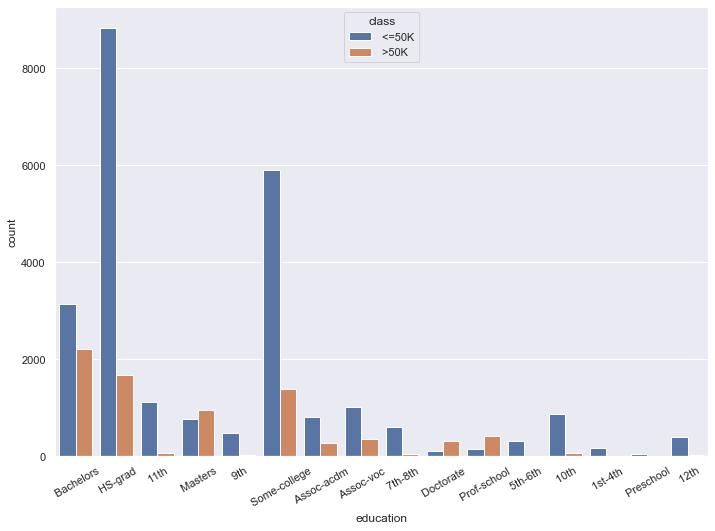

In [58]:
g= sns.countplot(data=data,x='education',hue='class')
g.set_xticklabels(g.get_xticklabels(),rotation=30);

<AxesSubplot:xlabel='marital-status', ylabel='count'>

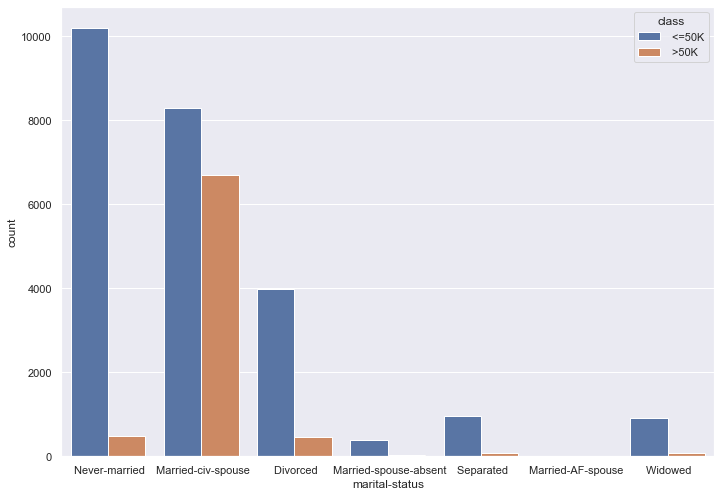

In [59]:
sns.countplot(data=data,x='marital-status',hue='class')

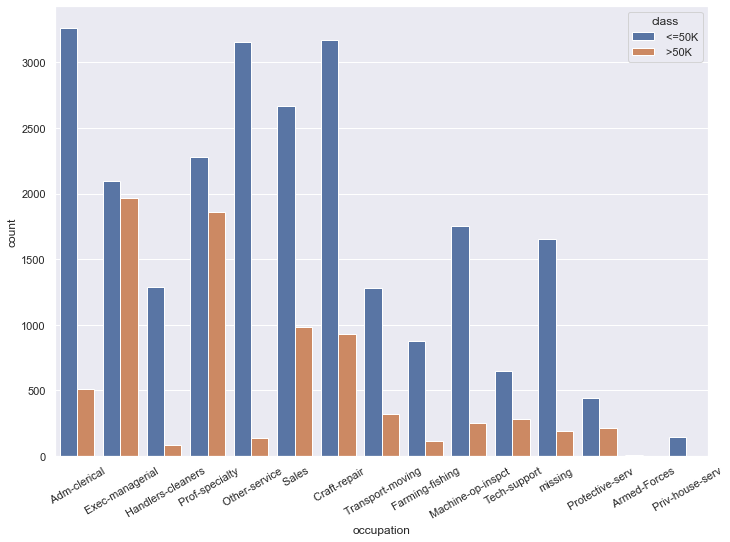

In [60]:
g=sns.countplot(data=data,x='occupation',hue='class',orient='v')
g.set_xticklabels(g.get_xticklabels(),rotation=30);


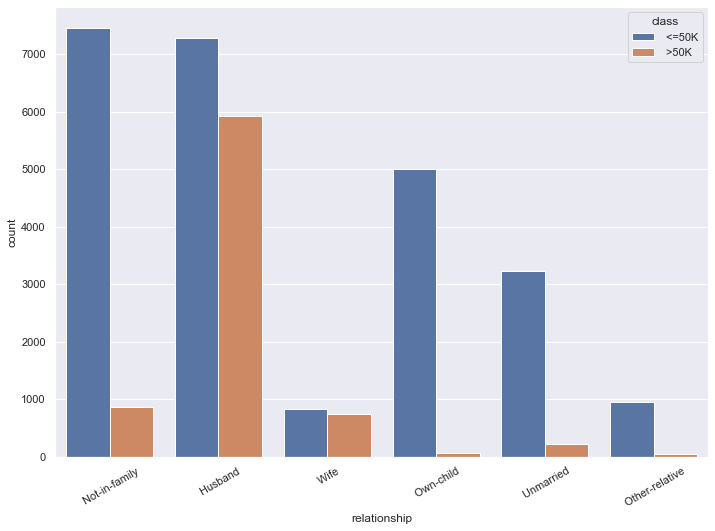

In [61]:
g=sns.countplot(data=data,x='relationship',hue='class',orient='v')
g.set_xticklabels(g.get_xticklabels(),rotation=30);

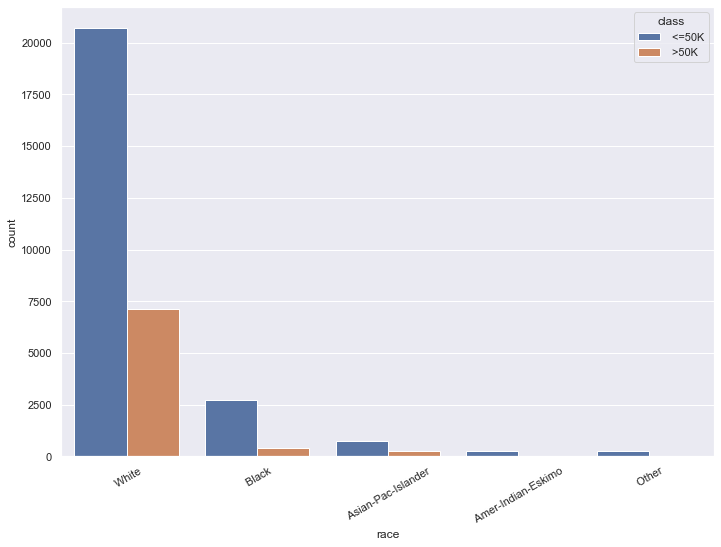

In [62]:
g=sns.countplot(data=data,x='race',hue='class',orient='v')
g.set_xticklabels(g.get_xticklabels(),rotation=30);

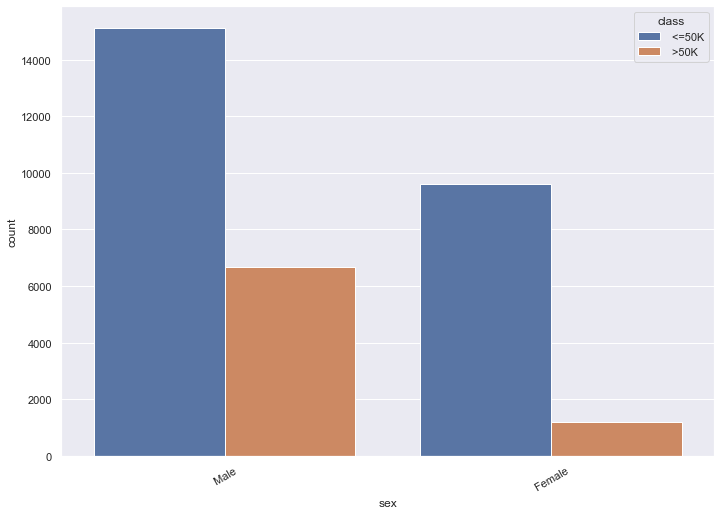

In [63]:
g=sns.countplot(data=data,x='sex',hue='class',orient='v')
g.set_xticklabels(g.get_xticklabels(),rotation=30);

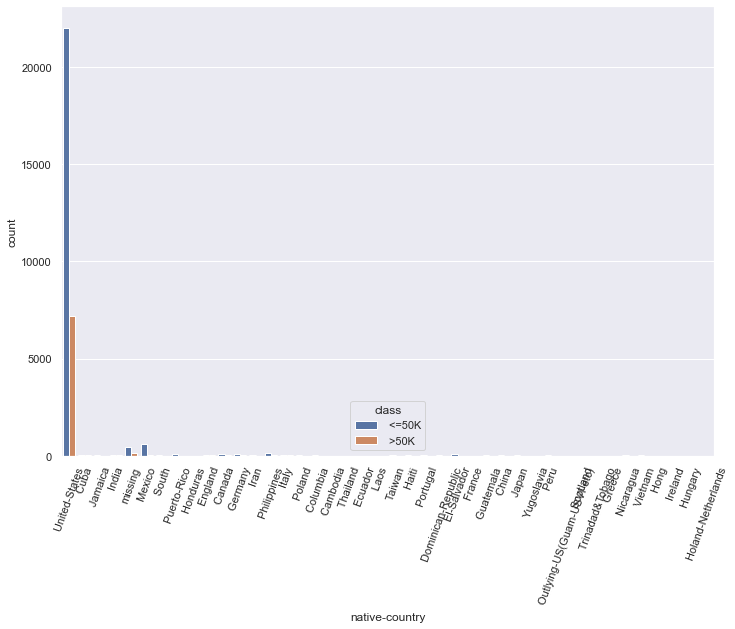

In [64]:
g=sns.countplot(data=data,x='native-country',hue='class',orient='v')
g.set_xticklabels(g.get_xticklabels(),rotation=70);

#### number of labels: cardinality

In [65]:
data[var_cat].nunique()

workclass          9
education         16
marital-status     7
occupation        15
relationship       6
race               5
sex                2
native-country    42
class              2
dtype: int64


#### Rare labels

In [66]:

def analyse_rare_labels(df, var,target, rare_perc):
    df = df.copy()

    # determine the % of observations per category
    tmp = df.groupby(var)[target].count() / len(df)

    # return categories that are rare
    return tmp[tmp < rare_perc]

# print categories that are present in less than
# 1 % of the observations


for var in var_cat:
    print(analyse_rare_labels(data, var,'class', 0.01))
    print()

workclass
 Never-worked    0.000215
 Without-pay     0.000430
Name: class, dtype: float64

education
 1st-4th      0.005160
 Preschool    0.001566
Name: class, dtype: float64

marital-status
 Married-AF-spouse    0.000706
Name: class, dtype: float64

occupation
 Armed-Forces       0.000276
 Priv-house-serv    0.004576
Name: class, dtype: float64

Series([], Name: class, dtype: float64)

race
 Amer-Indian-Eskimo    0.009551
 Other                 0.008323
Name: class, dtype: float64

Series([], Name: class, dtype: float64)

native-country
 Cambodia                      0.000584
 Canada                        0.003716
 China                         0.002303
 Columbia                      0.001812
 Cuba                          0.002918
 Dominican-Republic            0.002150
 Ecuador                       0.000860
 El-Salvador                   0.003255
 England                       0.002764
 France                        0.000891
 Germany                       0.004207
 Greece         

We need to create a rare category for most categorical variable.